<img src="cognorise.png" width="900" height="300">

<img src="presentation.png" width="900" height="300">


# Importing the necessary modules

In [1]:
import pandas as pd 
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
import pickle

# Load the dataset

In [2]:
dff=pd.read_csv('IRIS.csv')
dff.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#load the dataset
df=pd.read_csv('IRIS.csv', index_col='species')
df.head()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.1,3.5,1.4,0.2
Iris-setosa,4.9,3.0,1.4,0.2
Iris-setosa,4.7,3.2,1.3,0.2
Iris-setosa,4.6,3.1,1.5,0.2
Iris-setosa,5.0,3.6,1.4,0.2


# One-dimensional analysis

In [4]:
#let have more information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, Iris-setosa to Iris-virginica
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
dtypes: float64(4)
memory usage: 5.9+ KB


In [5]:
#Verify if is there any missing values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
dtype: int64

In [6]:
#decription of the dataset
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


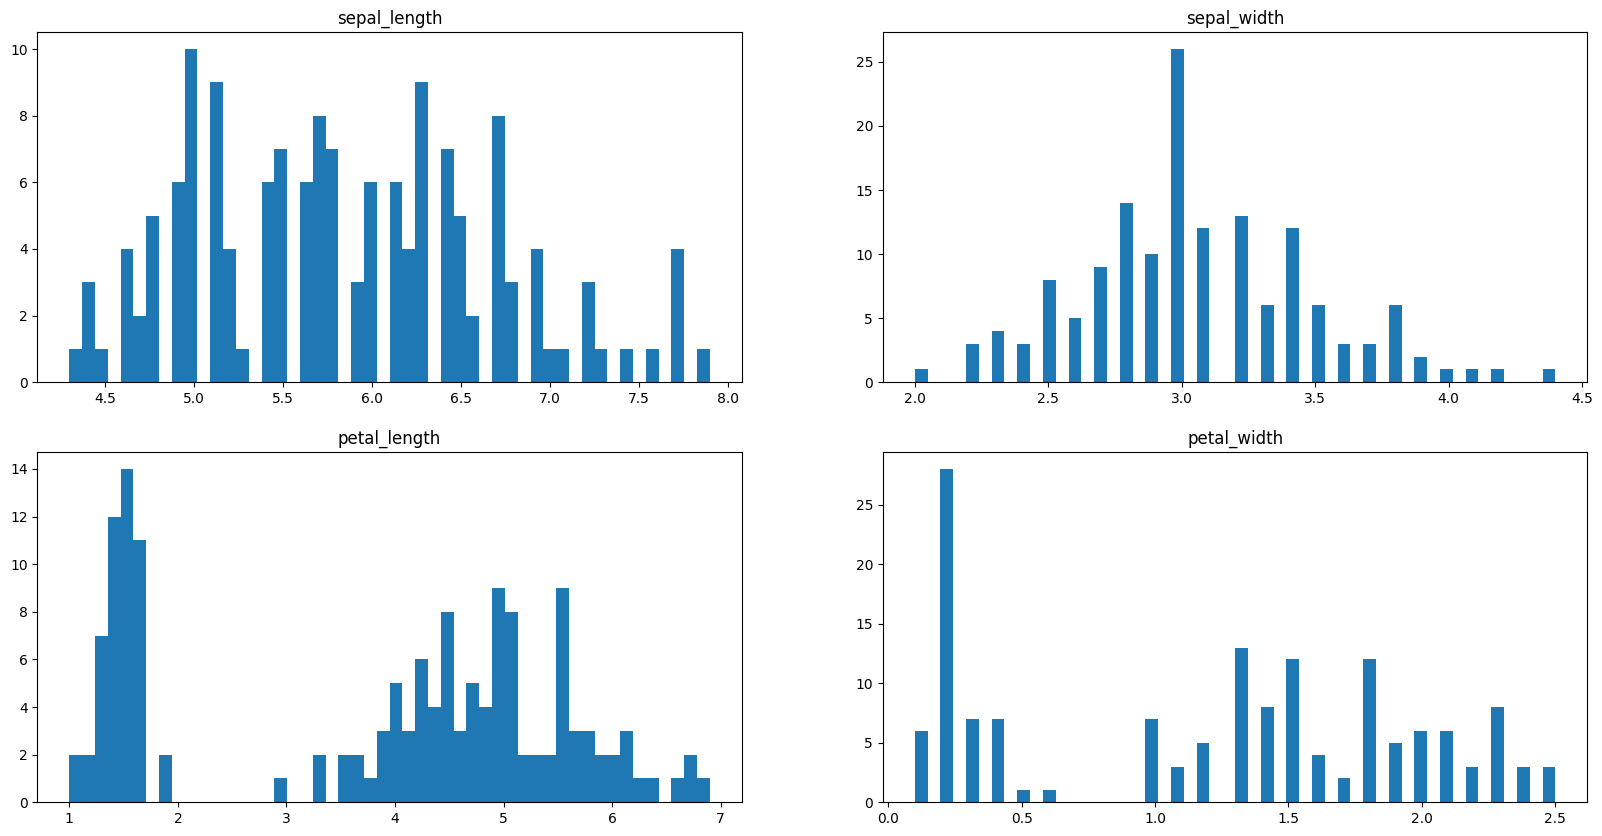

In [7]:
# Visualization of the variables distribution 
fig, axs = plt.subplots(2,2 , figsize=(20, 10))
axs = axs.ravel()

for i, column in enumerate(df.columns):
    axs[i].hist(df[column], bins=50)
    axs[i].set_title(column)

plt.show()

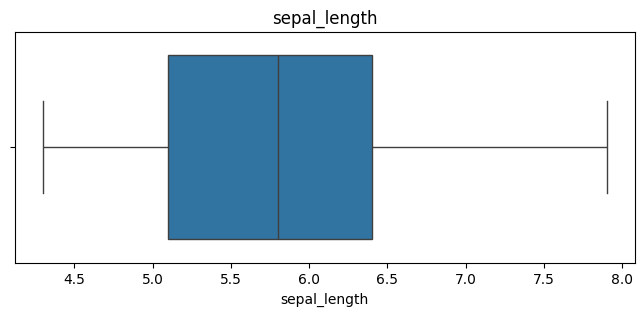

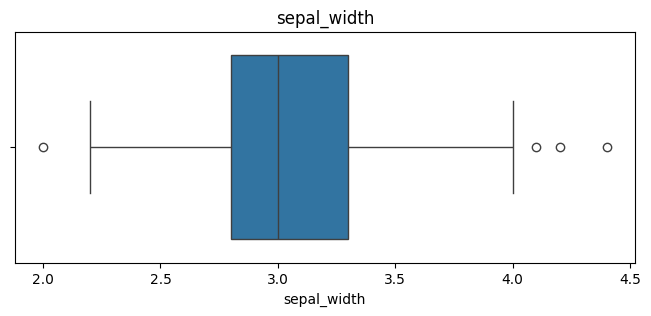

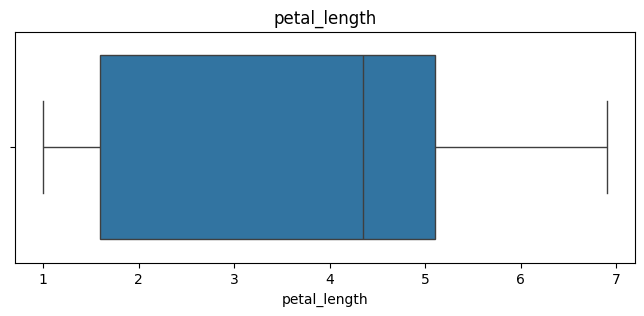

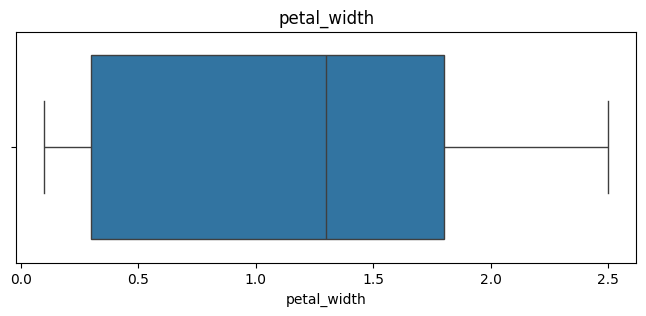

In [8]:
# boxplots for each variabl (to check if is there any outliers)
for column in df.columns:
    fig, ax = plt.subplots(figsize=(8, 3))
    sns.boxplot(x=df[column], ax=ax)
    plt.title(column)
    plt.show()

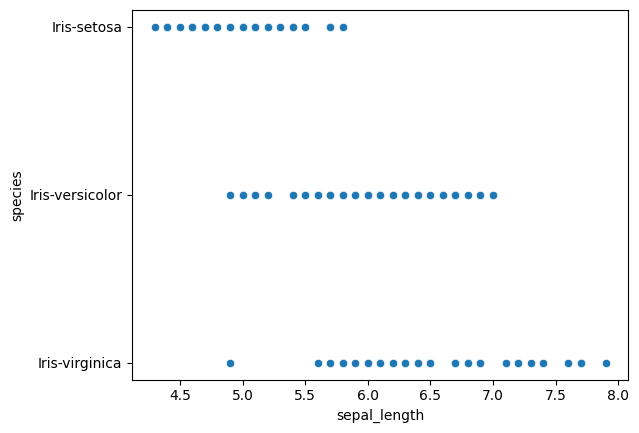

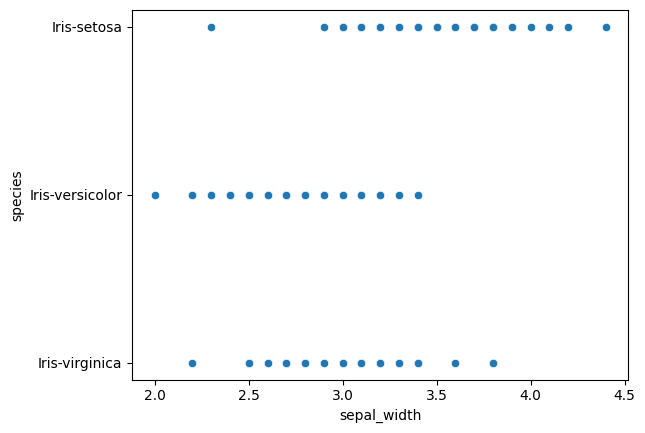

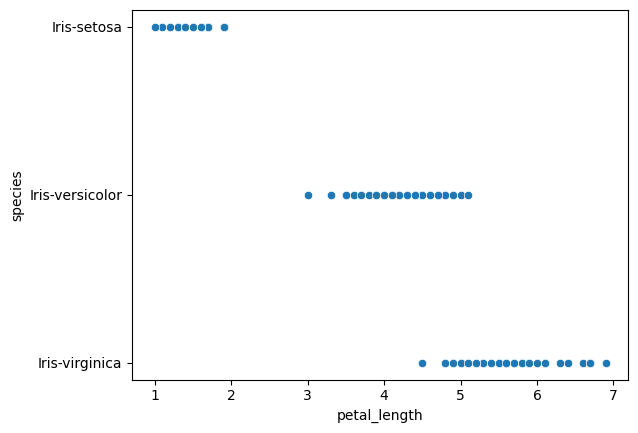

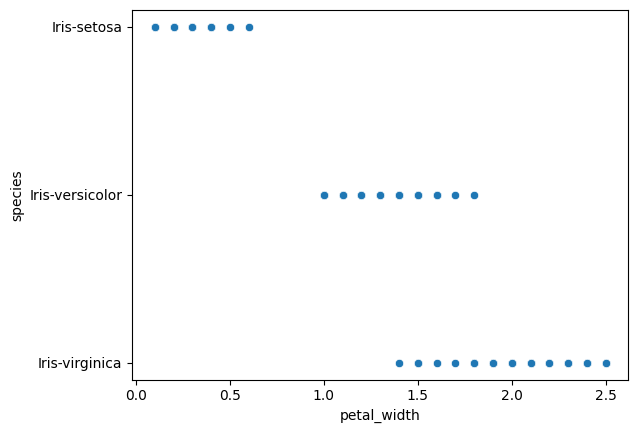

In [9]:
# Extraction of explanatory variable columns
X = dff.drop("species", axis=1)

# Displaying scatter plots between the variable to be explained and all explanatory variables with seaborn
for col in X.columns:
    sns.scatterplot(x=X[col], y=dff["species"])
    plt.show()

## Bivariate analyzes

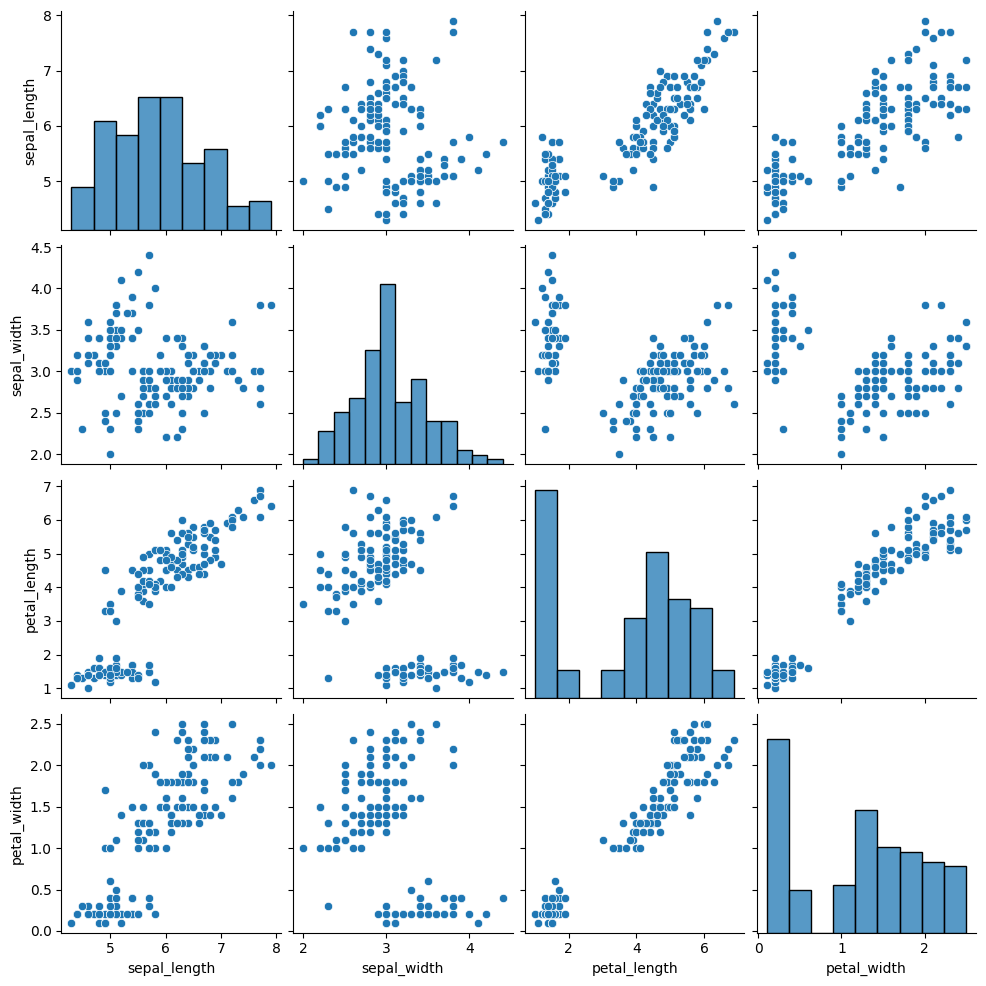

In [10]:
# Bivariate plots
sns.pairplot(df)
plt.show()

<Figure size 1200x600 with 0 Axes>

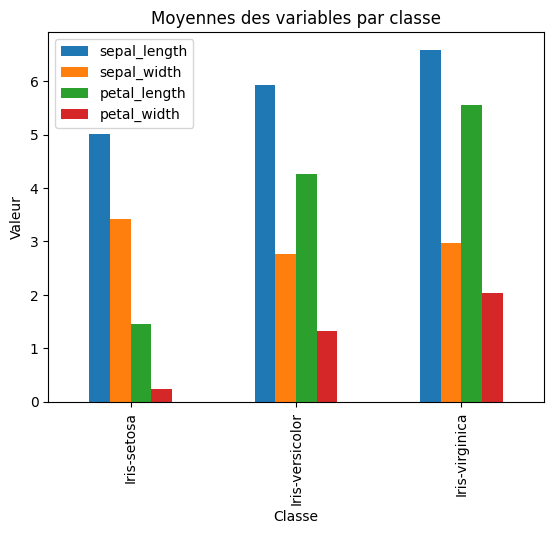

In [11]:
# Bar plot for the means of each variable by class
plt.figure(figsize=(12, 6))
means = df.groupby('species').mean()
means.plot(kind='bar')
plt.title('Moyennes des variables par classe')
plt.xlabel('Classe')
plt.ylabel('Valeur')
plt.show()

<Axes: >

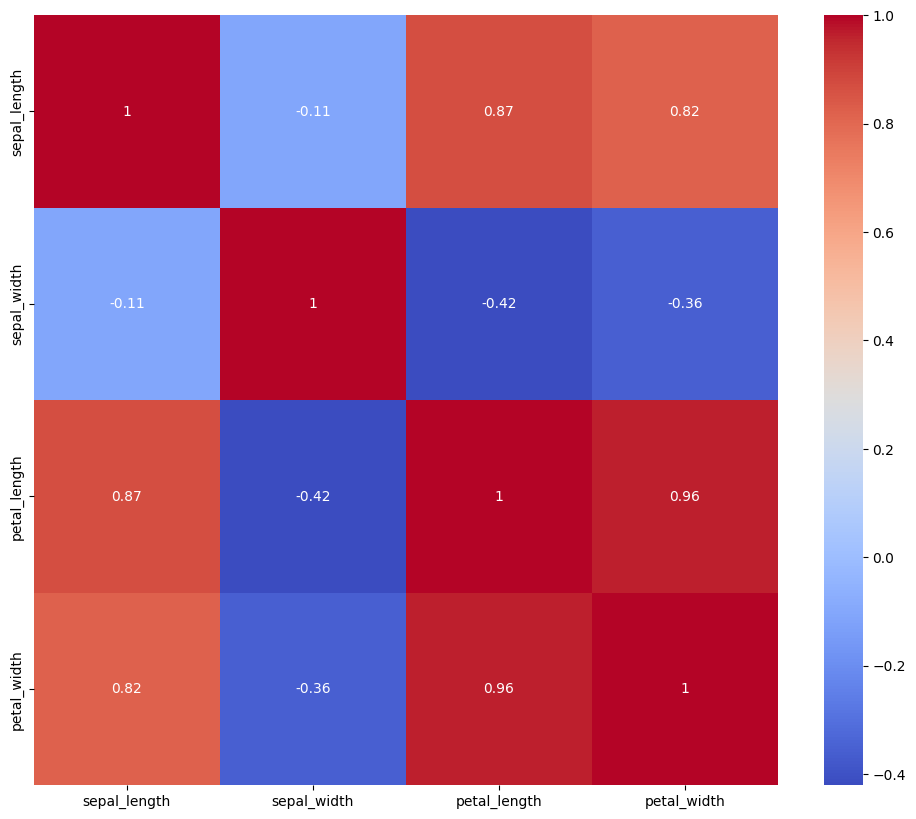

In [12]:
# Calculation of the correlation matrix
corr_matrix = df.corr()


plt.figure(figsize=(12, 10))
# Displaying the correlation matrix as a heatmap with seaborn
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")

In [13]:
# Extraction of variables having a correlation greater than 0.6 with the variable of interest
corr_threshold = 0.6
corr_vars = corr_matrix[abs(corr_matrix["petal_width"]) > corr_threshold].index.tolist()

# Display of variables having a correlation greater than 0.6 with the variable of interest
print("Variables ayant une corrélation supérieure à 0.6 avec la variable d'intérêt (Valeur_med_logement) :\n")
print(corr_vars)

Variables ayant une corrélation supérieure à 0.6 avec la variable d'intérêt (Valeur_med_logement) :

['sepal_length', 'petal_length', 'petal_width']


# Split the dataset

In [14]:
#Separation of the dataset
X=dff.drop(['species'],axis=1)
y=dff['species']
#We will standardize the variables of X and encode y
scaler=StandardScaler()
encoder=LabelEncoder()
X_scaled=scaler.fit_transform(X)
y_encoded= encoder.fit_transform(y)


X_train, X_test, y_train, y_test= train_test_split(X_scaled,y_encoded, test_size=0.2)


In [15]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


# The classes of our encoder dataset 
### Iris-setosa : 0
### Iris-versicolor : 1
### Iris-virginica : 2

In [16]:
model=LogisticRegression()
model.fit(X_train,y_train)


LogisticRegression()

In [17]:
#Let's calculate the predict value
y_pred=model.predict(X_test)
#Let's save the model
with open('model_iris.pkl', 'wb') as f:
    pickle.dump(model, f) 
print("Model enregistre")


Model enregistre


In [18]:
accuracy = accuracy_score(y_pred, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.9666666666666667


In [19]:
#The confusion matrix 
conf_matrix = confusion_matrix(y_pred, y_test)
print("Confusion Matrix :")
print(conf_matrix)

Confusion Matrix :
[[ 9  0  0]
 [ 0  8  1]
 [ 0  0 12]]


# Interpretation of the confusion matrix
The first line corresponds to class 0: You have 7 correct predictions for class 0 (True Negative), and no incorrect predictions for this class.
The second line corresponds to class 1: You have 15 correct predictions for class 1 (True Positive), and no incorrect predictions for this class.
The third line corresponds to class 2: You have 7 correct predictions for class 2 (True Positive), and 1 incorrect prediction for this class (False Negative)

In [20]:
# the précision
precision = precision_score(y_test, y_pred, average='weighted')
print("Précision :", precision)

Précision : 0.9703703703703703


In [21]:
# the Recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Rappel :", recall)

Rappel : 0.9666666666666667


In [22]:
# the F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-score :", f1)

F1-score : 0.9669803921568628


<img src="end.png" width="900" height="500">


<img src="thank.png" width="900" height="500">